# load packages and modules

In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import MangroveConservation.get_twitter_data1 as getTwitterdata
import MangroveConservation.clean_text1 as clean
import MangroveConservation.network_analysis as network
import MangroveConservation.sentiment_analysis1 as sentiment

help(getTwitterdata.get_data)

Help on function get_data in module MangroveConservation.get_twitter_data1:

get_data(SEARCH_QUERY, DEV_ENVIRONMENT_LABEL, API_SCOPE, API_KEY, API_SECRET_KEY, TO_DATE, FROM_DATE, FILENAME)
    get twitter data through twitter API from full archive search sand box and return all twitters in JSONL file
    based on 
     search term, 
     the geographic location of interest
     the time period of interest.
     and personal twitter account information.
    
     Reference: https://github.com/geduldig/TwitterAPI/tree/master/TwitterAPI
     Reference: https://developer.twitter.com/en/docs/tweets/search/overview



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/gongmimi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gongmimi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# pdoc,pytest and lint score

In [ ]:
#pdoc3
!export PATH=$PATH:~/.local/bin/; cd CMSE802/MangroveConservation;pdoc3 --force --html --output-dir ./docs MangroveConservation/filename.py

In [1]:
#pytest
!export PYTHONPATH=</home/gongmimi/CMSE802/MangroveConservation/MangroveConservation>: $PYTHONPATH; pytest MangroveConservation/test/test_get_data

============================= test session starts ==============================
platform linux -- Python 3.7.3, pytest-5.2.2, py-1.8.0, pluggy-0.13.0
rootdir: /home/gongmimi/CMSE802/MangroveConservation
plugins: arraydiff-0.3, doctestplus-0.4.0, openfiles-0.4.0, remotedata-0.3.2
collected 11 items / 1 errors / 10 selected                                    

==================================== ERRORS ====================================
_ ERROR collecting envs/lib/python3.8/site-packages/numexpr/tests/test_numexpr.py _
ImportError while importing test module '/home/gongmimi/CMSE802/MangroveConservation/envs/lib/python3.8/site-packages/numexpr/tests/test_numexpr.py'.
Hint: make sure your test modules/packages have valid Python names.
Traceback:
envs/lib/python3.8/site-packages/numexpr/__init__.py:38: in <module>
    from numexpr.expressions import E
envs/lib/python3.8/site-packages/numexpr/expressions.py:49: in <module>
    from numexpr import interpreter
E   ImportError: cannot impor

In [2]:
#linting
!pylint MangroveConservation.sentiment_analysis1

************* Module MangroveConservation.sentiment_analysis1
MangroveConservation/sentiment_analysis1.py:30:10: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:35:77: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:97:10: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:99:11: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:134:10: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:136:11: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:154:11: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:168:30: C0303: Trailing whitespace (trailing-whitespace)
MangroveConservation/sentiment_analysis1.py:8:0: W0105: String statement has no effect (pointless-string-statement)
MangroveConservati

In [15]:
!export PATH=$PATH:~/.local/bin/; autopep8 MangroveConservation/sentiment_analaysis.py  > MangroveConservation/sentiment_analysis1.py


# collect twitter data


In [52]:
###collect twitter data and save them into CSV
API_KEY = 'i2uWM8Fvt36ipy3pEXk5Cy7ue'
API_SECRET_KEY = 'FKZBP7QjykINzuAJPVaEsO5l106xd939lmNmXoWQhl0Arqhpzz'
DEV_ENVIRONMENT_LABEL = 'mangroveConservation'
API_SCOPE = 'fullarchive'  # 'fullarchive' for full archive, '30day' for last 31 days

SEARCH_QUERY = '-RT mangrove forest'
TO_DATE = '2019-06-19' # format YYYY-MM-DD HH:MM (hour and minutes optional)
FROM_DATE = '2019-01-01'  # format YYYY-MM-DD HH:MM (hour and minutes optional)
FILENAME = 'twitter_premium_api_demo1.jsonl'  # Where the Tweets should be saved
csvfile = 'mangrove1.csv'

#getTwitterdata.get_data(SEARCH_QUERY,DEV_ENVIRONMENT_LABEL,API_SCOPE,API_KEY,API_SECRET_KEY,TO_DATE,FROM_DATE,FILENAME)


In [53]:
#FILENAME = '/home/gongmimi/CMSE802/MangroveConservation/MangroveConservation/test/test_tweet.jsonl'
#csvfile = '/home/gongmimi/CMSE802/MangroveConservation/MangroveConservation/test/test_tweet.csv'

tweets = getTwitterdata.load_jsonl(FILENAME)

getTwitterdata.create_csv(tweets,csvfile)


,created_at,id,username,user_joined,user_location,user_bio,follower_count,text,country_code,place,coordinates
0,Mon Dec 30 21:11:32 +0000 2019,1211756730616561670,Nach not Notch,2011,"Los Angeles, CA",i like food,382,I might regret this in more than one way... \n...,NaN,NaN,NaN
1,Mon Dec 30 20:11:45 +0000 2019,1211741686612709376,♑️ NAIDU ✨,2012,Hyderabad Telangana India 🇮🇳,Be — Don't Try To Become,19259,"India State of Forest Report, #ISFR2019 : \n\n...",NaN,NaN,NaN
2,Mon Dec 30 18:01:01 +0000 2019,1211708784902623232,Shwetal Shah,2011,India,"Technical Adviser, Dept of #Climate Change, #G...",363,Government of India released Forest report 201...,"(IN,)","Ahmadabad City, India","[[[72.436739, 22.923256], [72.436739, 23.10466..."
3,Mon Dec 30 17:40:59 +0000 2019,1211703743907008513,vinay shreshtha,2010,"पश्चिम बंगाल, भारत",None,0,'JOURNEY ABOUT TO START FOR THE MANGROVE FORES...,NaN,NaN,NaN
4,Mon Dec 30 17:24:12 +0000 2019,1211699521865965568,vinay shreshtha,2010,"पश्चिम बंगाल, भारत",None,0,"'ABOUT TO ENTER BICHITRAPUR MANGROVE FOREST,OD...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2995,Wed Jun 19 10:07:15 +0000 2019,1141286310474407936,colin warburton,2013,"Warrington, England","human/animal rights, people, other dimensions ...",1407,Dozens of tigers live in the Sundarbans mangro...,NaN,NaN,NaN
2996,Wed Jun 19 09:39:26 +0000 2019,1141279311795802112,Deji Sadiq,2011,"Lagos, Nigeria","I'm a LASU trained Economist turned Blogger, a...",1411,The 'tiger widows' of India Dozens of tigers l...,NaN,NaN,NaN
2997,Wed Jun 19 09:39:05 +0000 2019,1141279225279725569,Ultrascan HUMINT,2013,None,Liaison Reliable Primary #HUMINT Sources - Mon...,3341,The 'tiger widows' of India: Dozens of tigers ...,NaN,NaN,NaN
2998,Wed Jun 19 08:32:08 +0000 2019,1141262373451436032,MethaneNet,2010,University of Birmingham,"Biogeochemistry, sources, fluxes, microbiology...",1521,Are methane emissions from mangrove stems a cr...,NaN,NaN,NaN


In [102]:
raw = pd.read_csv("/home/gongmimi/CMSE802/MangroveConservation/MangroveConservation/test/test_tweet.csv", header=0)
print(raw)

                       created_at                   id            username  \
0  Wed Dec 11 07:39:16 +0000 2019  1204666948551925760     Subhro Mutsuddi   
1  Wed Dec 11 07:28:31 +0000 2019  1204664241392762886  Dr Peter Macreadie   

   user_joined         user_location  \
0         2013       Kolkata , India   
1         2013  Melbourne, Australia   

                                            user_bio  follower_count  \
0                                                NaN              94   
1  Head of Blue Carbon Lab @Deakin. Researching #...            3265   

                                                text country_code  \
0  Are u looking for Sundarban Mangrove Forest To...          NaN   
1  We were able to get deep into this magnificent...      ('AU',)   

                place                                        coordinates  
0                 NaN                                                NaN  
1  Cairns, Queensland  [[[145.650457, -17.038659], [145.650457, -16.7

In [100]:
tweets = clean.ImportTweet("/home/gongmimi/CMSE802/MangroveConservation/MangroveConservation/test/test_tweet.csv")
tweets['coordinates']


0                                                  NaN
1    [[[145.650457, -17.038659], [145.650457, -16.7...
Name: coordinates, dtype: object

# exploratory analysis

## collect the most fewquent words/phrases and graph wordcloud map

In [103]:
tweets = clean.ImportTweet("mangrove1.csv")
tweets.head()

tweets.to_csv("mangrove1_cleaned.csv", index=False, header=True)

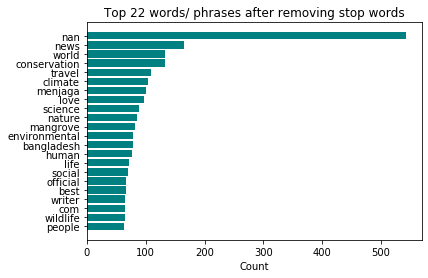

In [104]:
sentiment.PlotTopWords(tweets["user_description"],22,1,5)

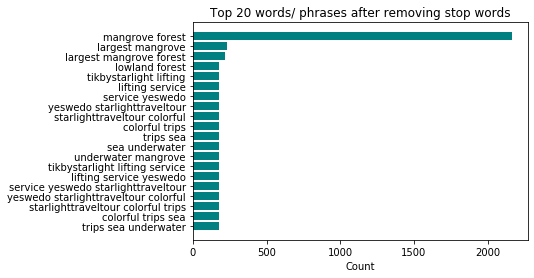

In [105]:
sentiment.PlotTopWords(tweets["tweet"],20,2,4)

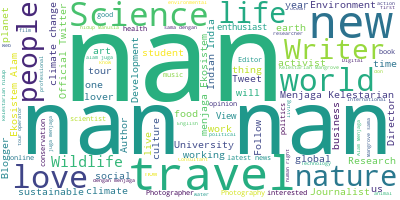

In [106]:
sentiment.PlotWordCloud(tweets['user_description'])

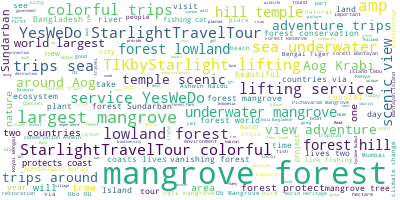

In [63]:
sentiment.PlotWordCloud(tweets['tweet'])

# sentiment analysis

In [109]:
tweets["sentiment"]=sentiment.Sentiment(tweets["tweet"])
tweets.head()
tweets.to_csv("mangrove1_cleaned.csv", index=False, header=True)

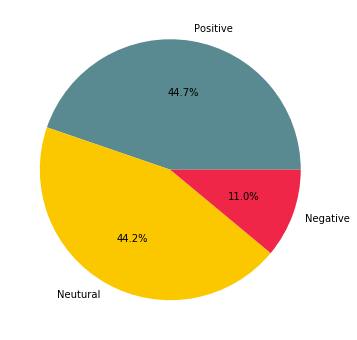

In [108]:
sentiment.PlotSentiment(tweets["sentiment"])

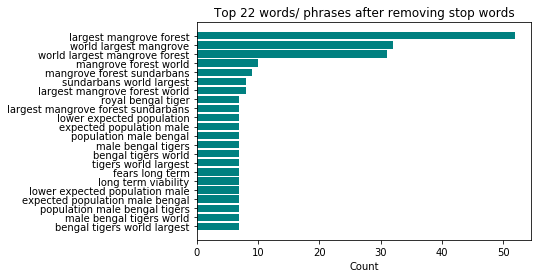

In [86]:
negative = tweets[tweets['sentiment']=='Negative']['tweet']
sentiment.PlotTopWords(negative,22,3,5)

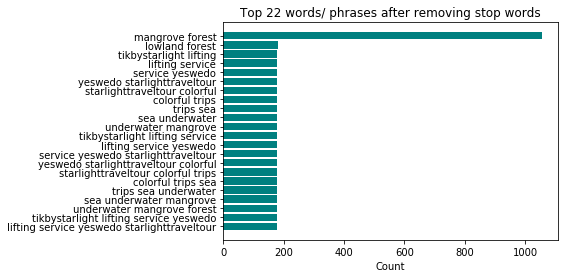

In [96]:
positive = tweets[tweets['sentiment']=='Positive']['tweet']
sentiment.PlotTopWords(positive,22,2,4)

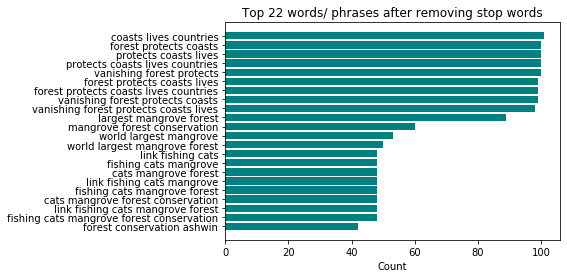

In [94]:
neutral = tweets[tweets['sentiment']=='Neutral']['tweet']
sentiment.PlotTopWords(neutral,22,3,5)

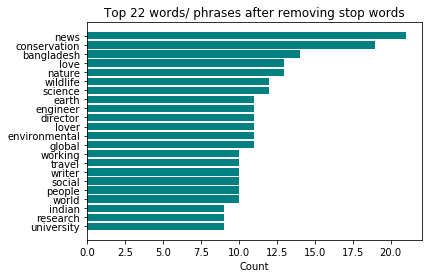

In [100]:
neg_user = tweets[tweets['sentiment']=='Negative']['user_description']
sentiment.PlotTopWords(neg_user,22,1,5)

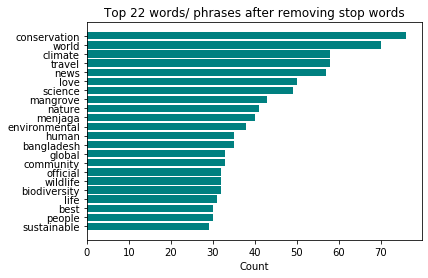

In [101]:
pos_user = tweets[tweets['sentiment']=='Positive']['user_description']
sentiment.PlotTopWords(pos_user,22,1,5)

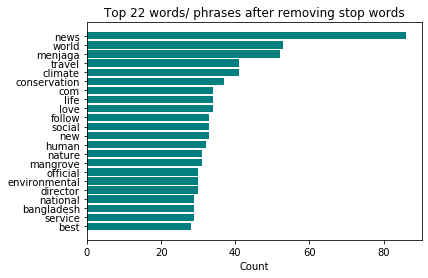

In [102]:
neu_user = tweets[tweets['sentiment']=='Neutral']['user_description']
sentiment.PlotTopWords(neu_user,22,1,5)

# Data visualization

In [78]:
import geopy
#import geopandas
item = tweets['user_location']
print(item)


0                                    Los Angeles, CA
1                       Hyderabad Telangana India 🇮🇳
2                                              India
3                                 पश्चिम बंगाल, भारत
4                                 पश्चिम बंगाल, भारत
5                                                NaN
6                                                NaN
7                                             Mumbai
8                                          New Delhi
9                                       New York, NY
10                                               NaN
11                                               NaN
12                                            Odisha
13                                      G.Bhavavaram
14                               Bhubaneshwar, India
15                                  New Delhi, India
16                                  New Delhi, India
17                            New Delhi / Chandigarh
18                                  New Delhi,

In [ ]:
locator = Nominatim(user_agent=”myGeocoder”)
location = locator.geocode(item)
    

# Network analysis

In [1]:
# name of the file with the Tweet objects

GEXF_FILE = 'demo_network.gexf'
network.create_gexf(tweets, GEXF_FILE)


NameError: name 'network' is not defined